## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  54.870009  1737.609107  0.967210  3.031388  1681.463785
1  12.762448   855.696595  0.159147  8.394298   136.812095
2  34.713422   920.234363  0.623810  4.272195   575.039412
3  74.420727  1041.054610  0.988216  3.729167  1031.481069
4  13.381108   622.432664  0.590453  8.770710   367.768693


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0288207	total: 69.5ms	remaining: 1m 9s
1:	learn: 1.0171754	total: 70.2ms	remaining: 35s
2:	learn: 1.0058707	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9940509	total: 71.3ms	remaining: 17.7s
4:	learn: 0.9803018	total: 71.8ms	remaining: 14.3s
5:	learn: 0.9674390	total: 72.3ms	remaining: 12s
6:	learn: 0.9540928	total: 72.8ms	remaining: 10.3s
7:	learn: 0.9415427	total: 73.2ms	remaining: 9.08s
8:	learn: 0.9289575	total: 73.7ms	remaining: 8.11s
9:	learn: 0.9157138	total: 74.1ms	remaining: 7.34s
10:	learn: 0.9037844	total: 74.6ms	remaining: 6.71s
11:	learn: 0.8898017	total: 75ms	remaining: 6.18s
12:	learn: 0.8771295	total: 75.6ms	remaining: 5.74s
13:	learn: 0.8654925	total: 76ms	remaining: 5.35s
14:	learn: 0.8538092	total: 76.4ms	remaining: 5.02s
15:	learn: 0.8429648	total: 76.9ms	remaining: 4.73s
16:	learn: 0.8318696	total: 77.4ms	remaining: 4.47s
17:	learn: 0.8221318	total: 77.8ms	remaining: 4.25s
18:	learn: 0.8139350	total: 78.2ms	remaining: 4.04s


88:	learn: 0.3592734	total: 109ms	remaining: 1.11s
89:	learn: 0.3561397	total: 109ms	remaining: 1.1s
90:	learn: 0.3531184	total: 110ms	remaining: 1.09s
91:	learn: 0.3491126	total: 110ms	remaining: 1.09s
92:	learn: 0.3455545	total: 111ms	remaining: 1.08s
93:	learn: 0.3419383	total: 111ms	remaining: 1.07s
94:	learn: 0.3379476	total: 111ms	remaining: 1.06s
95:	learn: 0.3346132	total: 112ms	remaining: 1.05s
96:	learn: 0.3309744	total: 112ms	remaining: 1.04s
97:	learn: 0.3279955	total: 112ms	remaining: 1.03s
98:	learn: 0.3243768	total: 113ms	remaining: 1.03s
99:	learn: 0.3207515	total: 113ms	remaining: 1.02s
100:	learn: 0.3175041	total: 113ms	remaining: 1.01s
101:	learn: 0.3143343	total: 114ms	remaining: 1s
102:	learn: 0.3114967	total: 114ms	remaining: 993ms
103:	learn: 0.3087475	total: 114ms	remaining: 985ms
104:	learn: 0.3048872	total: 115ms	remaining: 980ms
105:	learn: 0.3024768	total: 115ms	remaining: 973ms
106:	learn: 0.2994346	total: 116ms	remaining: 966ms
107:	learn: 0.2960227	total:

274:	learn: 0.0865959	total: 187ms	remaining: 492ms
275:	learn: 0.0862516	total: 187ms	remaining: 491ms
276:	learn: 0.0858924	total: 187ms	remaining: 489ms
277:	learn: 0.0855413	total: 188ms	remaining: 488ms
278:	learn: 0.0851486	total: 188ms	remaining: 487ms
279:	learn: 0.0846342	total: 189ms	remaining: 485ms
280:	learn: 0.0842925	total: 189ms	remaining: 484ms
281:	learn: 0.0837521	total: 190ms	remaining: 483ms
282:	learn: 0.0831908	total: 190ms	remaining: 482ms
283:	learn: 0.0827048	total: 191ms	remaining: 481ms
284:	learn: 0.0823921	total: 191ms	remaining: 480ms
285:	learn: 0.0820306	total: 192ms	remaining: 479ms
286:	learn: 0.0817745	total: 192ms	remaining: 477ms
287:	learn: 0.0813648	total: 193ms	remaining: 476ms
288:	learn: 0.0806723	total: 193ms	remaining: 475ms
289:	learn: 0.0804140	total: 193ms	remaining: 474ms
290:	learn: 0.0800680	total: 194ms	remaining: 472ms
291:	learn: 0.0797321	total: 194ms	remaining: 471ms
292:	learn: 0.0794768	total: 195ms	remaining: 469ms
293:	learn: 

504:	learn: 0.0328985	total: 290ms	remaining: 284ms
505:	learn: 0.0328219	total: 291ms	remaining: 284ms
506:	learn: 0.0327902	total: 291ms	remaining: 283ms
507:	learn: 0.0325943	total: 291ms	remaining: 282ms
508:	learn: 0.0324516	total: 292ms	remaining: 281ms
509:	learn: 0.0324208	total: 292ms	remaining: 281ms
510:	learn: 0.0323532	total: 292ms	remaining: 280ms
511:	learn: 0.0322140	total: 293ms	remaining: 279ms
512:	learn: 0.0321840	total: 293ms	remaining: 278ms
513:	learn: 0.0320473	total: 294ms	remaining: 278ms
514:	learn: 0.0320156	total: 294ms	remaining: 277ms
515:	learn: 0.0318815	total: 294ms	remaining: 276ms
516:	learn: 0.0317934	total: 295ms	remaining: 275ms
517:	learn: 0.0316378	total: 295ms	remaining: 274ms
518:	learn: 0.0315083	total: 295ms	remaining: 274ms
519:	learn: 0.0314021	total: 296ms	remaining: 273ms
520:	learn: 0.0313718	total: 296ms	remaining: 272ms
521:	learn: 0.0313420	total: 297ms	remaining: 272ms
522:	learn: 0.0313124	total: 297ms	remaining: 271ms
523:	learn: 

691:	learn: 0.0153717	total: 368ms	remaining: 164ms
692:	learn: 0.0153011	total: 369ms	remaining: 163ms
693:	learn: 0.0152522	total: 369ms	remaining: 163ms
694:	learn: 0.0152006	total: 369ms	remaining: 162ms
695:	learn: 0.0151560	total: 370ms	remaining: 162ms
696:	learn: 0.0151090	total: 370ms	remaining: 161ms
697:	learn: 0.0150703	total: 371ms	remaining: 160ms
698:	learn: 0.0150202	total: 371ms	remaining: 160ms
699:	learn: 0.0149825	total: 371ms	remaining: 159ms
700:	learn: 0.0149336	total: 372ms	remaining: 159ms
701:	learn: 0.0149000	total: 372ms	remaining: 158ms
702:	learn: 0.0148551	total: 372ms	remaining: 157ms
703:	learn: 0.0148238	total: 373ms	remaining: 157ms
704:	learn: 0.0147763	total: 373ms	remaining: 156ms
705:	learn: 0.0147367	total: 374ms	remaining: 156ms
706:	learn: 0.0147018	total: 374ms	remaining: 155ms
707:	learn: 0.0146657	total: 375ms	remaining: 154ms
708:	learn: 0.0146159	total: 375ms	remaining: 154ms
709:	learn: 0.0145781	total: 375ms	remaining: 153ms
710:	learn: 

925:	learn: 0.0081162	total: 472ms	remaining: 37.7ms
926:	learn: 0.0080922	total: 473ms	remaining: 37.2ms
927:	learn: 0.0080615	total: 473ms	remaining: 36.7ms
928:	learn: 0.0080381	total: 474ms	remaining: 36.2ms
929:	learn: 0.0079998	total: 474ms	remaining: 35.7ms
930:	learn: 0.0079755	total: 474ms	remaining: 35.2ms
931:	learn: 0.0079677	total: 475ms	remaining: 34.6ms
932:	learn: 0.0079605	total: 475ms	remaining: 34.1ms
933:	learn: 0.0079308	total: 476ms	remaining: 33.6ms
934:	learn: 0.0079112	total: 476ms	remaining: 33.1ms
935:	learn: 0.0078742	total: 477ms	remaining: 32.6ms
936:	learn: 0.0078620	total: 477ms	remaining: 32.1ms
937:	learn: 0.0078437	total: 477ms	remaining: 31.5ms
938:	learn: 0.0078360	total: 478ms	remaining: 31ms
939:	learn: 0.0078290	total: 478ms	remaining: 30.5ms
940:	learn: 0.0078004	total: 479ms	remaining: 30ms
941:	learn: 0.0077799	total: 479ms	remaining: 29.5ms
942:	learn: 0.0077437	total: 479ms	remaining: 29ms
943:	learn: 0.0077134	total: 480ms	remaining: 28.5ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

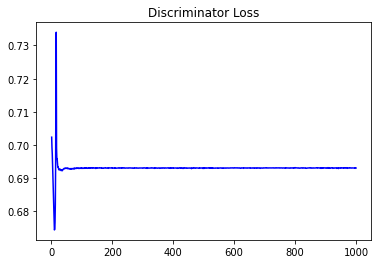

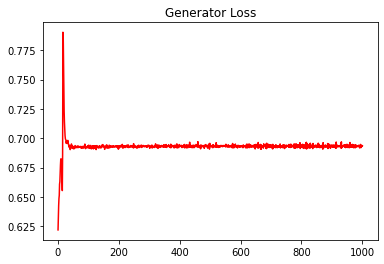

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.002774316641715268


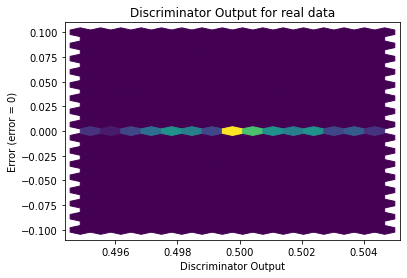

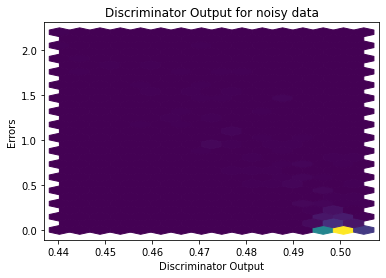

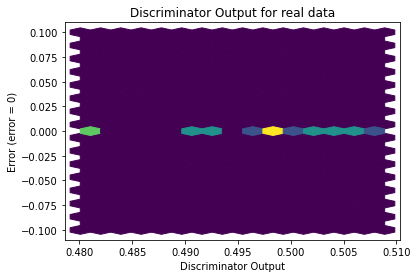

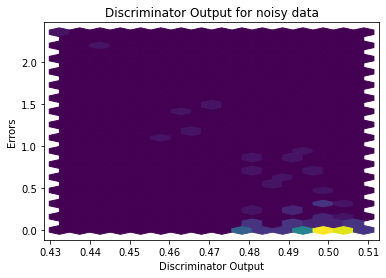

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


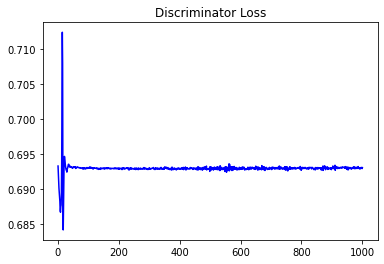

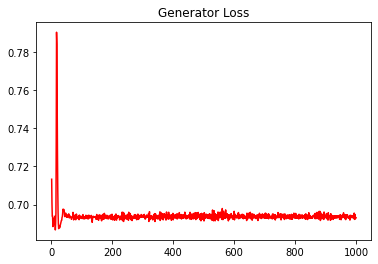

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.005755461181446342


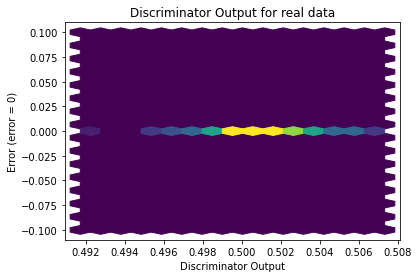

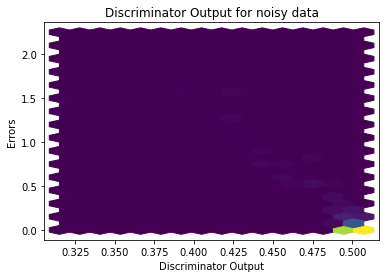

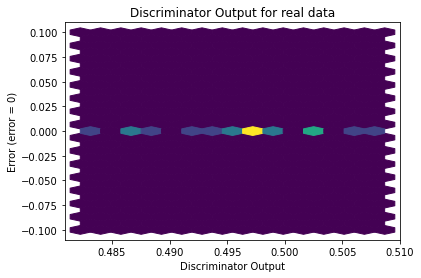

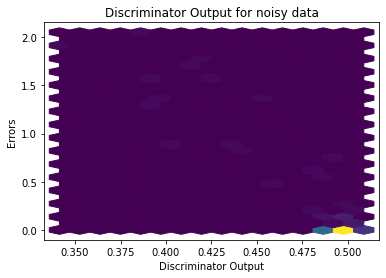

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4180]], requires_grad=True)
